In [ ]:
# DATA SCIENCE DEEP LEARNING
# STEP 01 IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model


In [ ]:
# STEP 02 LOAD AND PREPARE THE DATA
# Load your data
data = pd.read_excel('/content/COLOR COMBINATION DATASET_FEATURE SELECTION OUTCOMES.xlsx') # Replace with your file path
X = data.drop('BACKGROUND', axis=1) # Replace with your target column name
y = data['BACKGROUND'] # Replace with your target column name
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
# STEP 03 BUILD AND TRAIN THE MODEL
# Define the model
model = keras.Sequential([
 layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
 layers.Dropout(0.2),
 layers.Dense(64, activation='relu'),
 layers.Dense(1, activation='sigmoid') # For binary classification
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])

# Convert y_train to numeric type
#The following code will replace categorical values with numerical values
y_train = pd.Categorical(y_train).codes


# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2853 - loss: nan - val_accuracy: 0.2744 - val_loss: nan
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2536 - loss: nan - val_accuracy: 0.2744 - val_loss: nan
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2913 - loss: nan - val_accuracy: 0.2744 - val_loss: nan
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2921 - loss: nan - val_accuracy: 0.2744 - val_loss: nan
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2798 - loss: nan - val_accuracy: 0.2744 - val_loss: nan
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2514 - loss: nan - val_accuracy: 0.2744 - val_loss: nan
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2586 - loss: nan - val_accuracy: 0.2744 - val_loss: nan
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3040 - loss: nan - val_accuracy: 0.2744 - val_loss: nan
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

In [ ]:
# STEP 04 EVALUATE THE MODEL AND VALIDATE THE ERRORS
# Evaluate the model

# Convert y_test to numeric type
y_test = pd.Categorical(y_test).codes

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')
# Make predictions
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int).flatten() # Convert Probabilities to binary classes


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2611 - loss: nan 
Test Loss: nan, Test Accuracy: 0.27317073941230774
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


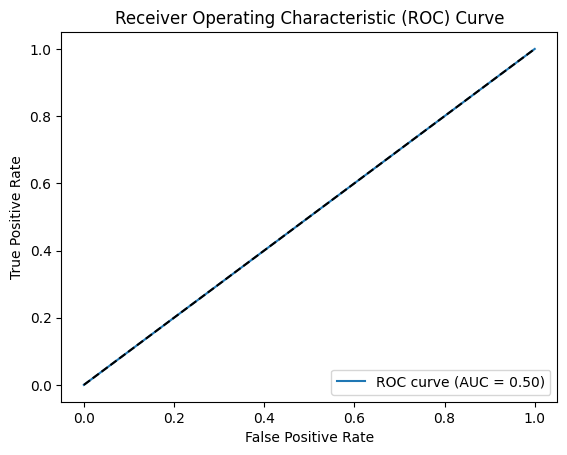

In [ ]:
# STEP 05 ROC CURVE VISUALIZATION
# Compute ROC curve and ROC area

# Check for NaN values in predictions and handle them
# If NaN values exist in 'predictions', replace them with 0
predictions = np.nan_to_num(predictions)

fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


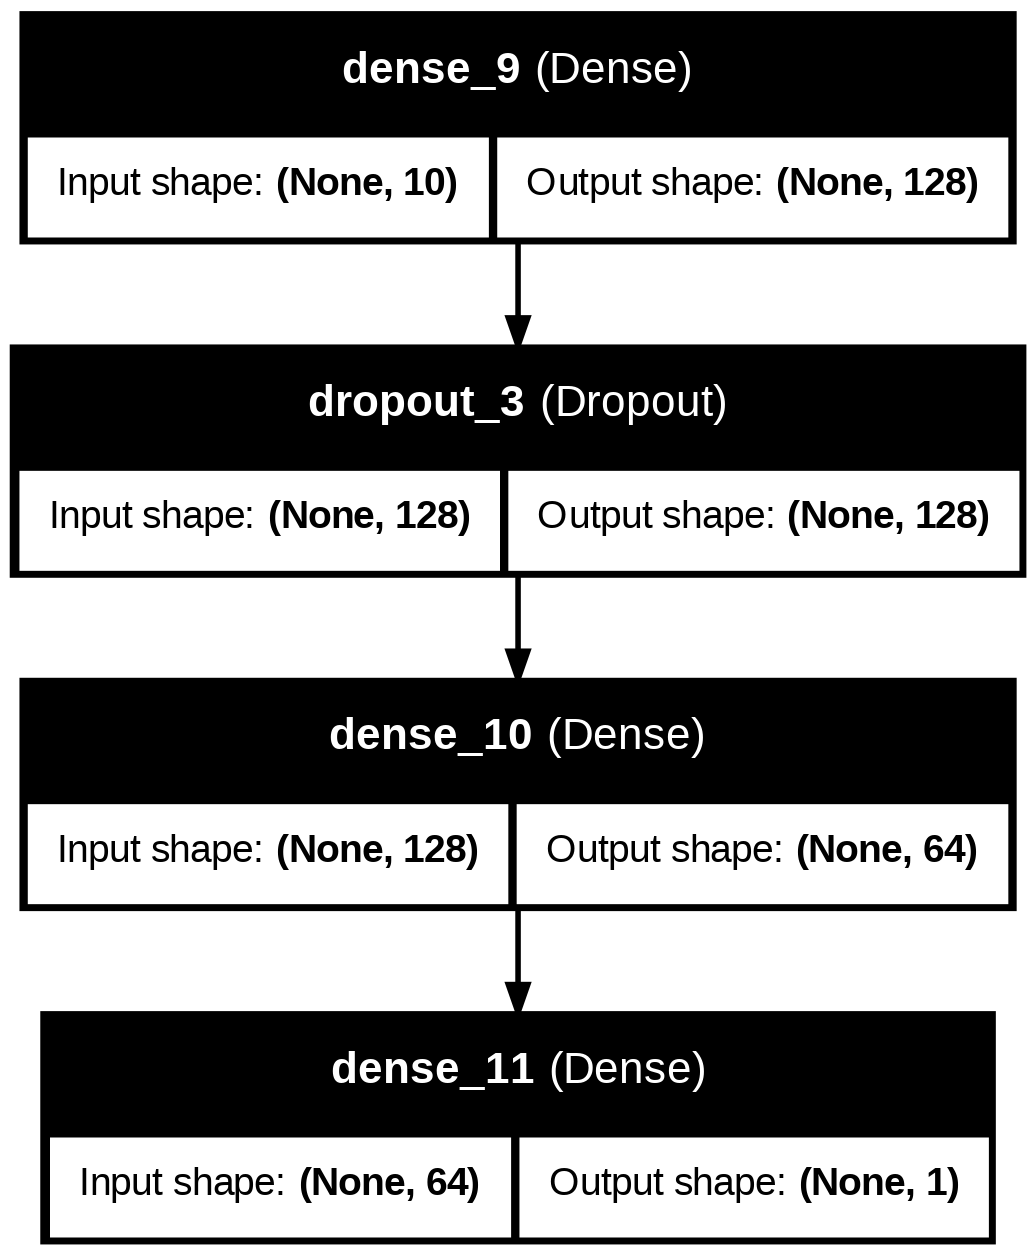

In [ ]:
# STEP 06 VISUALIZE THE MODEL ARCHITECTURE

# Plot model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Display the model architecture in Jupyter Notebook (if applicable)
from IPython.display import Image
Image(filename='model_architecture.png')


In [ ]:
# STEP 07 COMBINE PREDICTIONS FOR HYBRID MODEL BASED ON ACCURACY OF BEST MODELS
# Combine predictions using averaging(RANDOM FOREST PREDICTIONS)



# Placeholder for predictions from a Random Forest model (Assuming this was calculated in a previous step)
# Replace this with the actual predictions from your Random Forest model

from sklearn.metrics import accuracy_score

rf_predictions = np.zeros_like(predictions)

# Use the predictions from the deep learning model
dl_predictions = predictions

hybrid_predictions = (rf_predictions + dl_predictions) / 2
hybrid_class_predictions = (hybrid_predictions > 0.5).astype(int) # Convert to binary classes
"""OR
Instead of simple averaging, consider implementing a stacking model where you train a new model
(like logistic regression) on the outputs (predictions) of the Random Forest and Deep Learning
models. This can often improve performance further."""

from sklearn.linear_model import LogisticRegression
# Stack the predictions

stacked_X = np.column_stack((rf_predictions, dl_predictions))
stacking_model = LogisticRegression()
stacking_model.fit(stacked_X, y_test)

# Make final predictions
final_predictions = stacking_model.predict(stacked_X)
final_accuracy = accuracy_score(y_test, final_predictions)
print(f'Stacked Model Accuracy: {final_accuracy:.2f}')



Stacked Model Accuracy: 0.73


In [ ]:
## RANDOM FOREST MODEL
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Load the dataset from a CSV file
df = pd.read_excel('/content/COLOR COMBINATION DATASET_FEATURE SELECTION OUTCOMES.xlsx')

# Assume the target variable is in the last column
X = df.iloc[:, :-1].values  # feature data
y = df.iloc[:, -1].values  # target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_model = RandomForestClassifier(
    n_estimators=100,  # number of trees in the forest
    random_state=42,  # seed for reproducibility
    max_depth=None,  # maximum depth of the trees
    min_samples_split=2,  # minimum number of samples to split a node
    min_samples_leaf=1,  # minimum number of samples in a leaf node
    max_features='sqrt'  # maximum number of features to consider at each split
)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model's performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Model Accuracy: {rf_accuracy:.2f}')

# Now we can use the rf_predictions variable in the original code
# to combine the predictions with the Deep Learning model

Random Forest Model Accuracy: 0.83


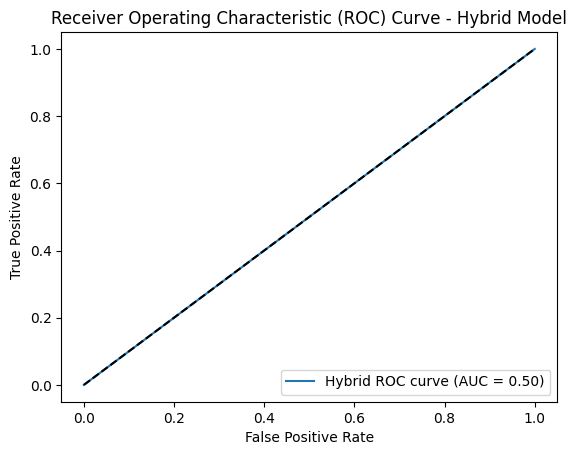

In [ ]:
# STEP 08 VISUALIZE THE ROC CURVE
# Plot ROC curve for hybrid model
plt.figure()
plt.plot(fpr, tpr, label=f'Hybrid ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Hybrid Model')
plt.legend(loc='lower right')
plt.show()


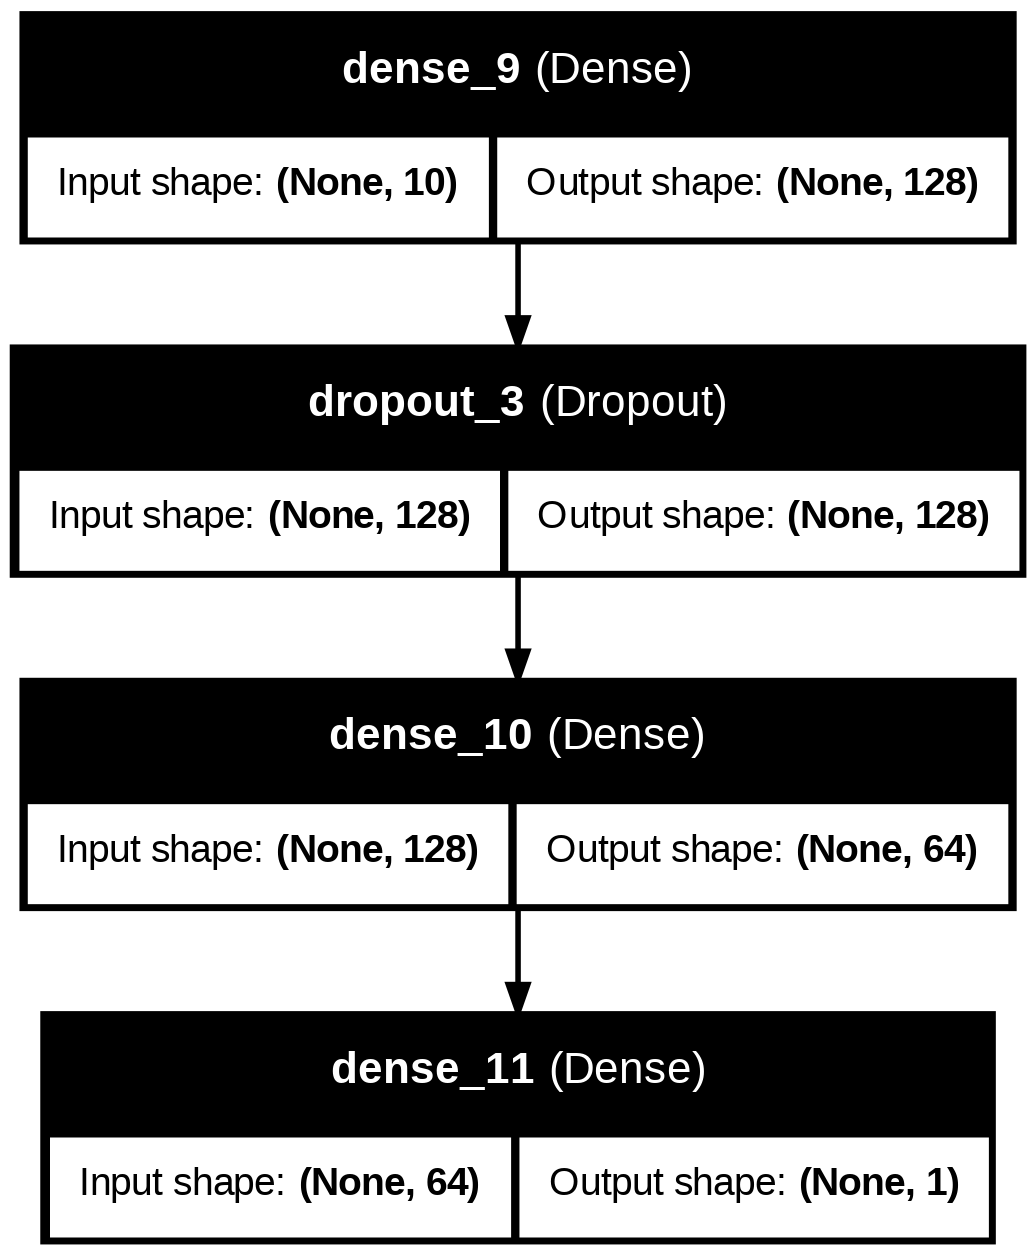

In [ ]:
# STEP 09 VISUALIZE MODEL ARCHITECTURE (DEEP LEARNING MODEL)

dl_model = model

# Plot model architecture for the Deep Learning model
plot_model(dl_model, to_file='dl_model_architecture.png', show_shapes=True,
show_layer_names=True)

# Display the model architecture in Jupyter Notebook (if applicable)
from IPython.display import Image
Image(filename='dl_model_architecture.png')


In [ ]:
# STEP 10 GENERATE PREDICTIONS FROM HYBRID MODEL
# Assume y_test is your true labels and hybrid_class_predictions are the predicted classes
# Generate predictions and compute errors

y_true = y_test
y_pred = hybrid_class_predictions # Binary predictions from the hybrid model


In [ ]:
# STEP 11 CLASSIFICATION REPORT
# Generate classification report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred,)
print(f"Accuracy: {accuracy}")
report = classification_report(y_true, y_pred, target_names=['Negative', 'Positive'])
print(report)


Accuracy: 0.2731707317073171
              precision    recall  f1-score   support

    Negative       0.27      1.00      0.43        56
    Positive       0.00      0.00      0.00       149

    accuracy                           0.27       205
   macro avg       0.14      0.50      0.21       205
weighted avg       0.07      0.27      0.12       205



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# STEP 12 ANALYZE MISCLASSIFICATIONS
# Identify misclassified samples
misclassified_indices = np.where(y_pred != y_true)[0]
misclassified_samples = X_test[misclassified_indices]

# Check if X_test is a DataFrame. If not, convert it to one
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test)

# Create a DataFrame for easier visualization
# Use X_test.columns to ensure matching columns
# Assign column names

misclassified_df = pd.DataFrame(misclassified_samples, columns=X_test.columns)

misclassified_df.columns = ['Green', 'Red', 'Blue', 'Yellow', 'Orange', 'Pink', 'Violet', 'Cyan', 'Combination']


misclassified_df['True Label'] = y_true[misclassified_indices]
misclassified_df['Predicted Label'] = y_pred[misclassified_indices]

# Display some misclassified samples
print(misclassified_df.head(10))


      Green      Red      Blue    Yellow    Orange      Pink    Violet  \
0  0.469144 -0.57889  0.839016 -0.704581  0.137649 -0.326083  0.005978   
1  0.469144 -0.57889  0.839016 -0.704581  0.137649 -0.326083  0.005978   
2  0.469144 -0.57889  0.839016 -0.704581  0.137649 -0.326083  0.005978   
3  0.469144 -0.57889  0.839016 -0.704581  0.137649 -0.326083  0.005978   
4  0.469144 -0.57889  0.839016 -0.704581  0.137649 -0.326083  0.005978   
5  0.469144 -0.57889  0.839016 -0.704581  0.137649 -0.326083  0.005978   
6  0.469144 -0.57889  0.839016 -0.704581  0.137649 -0.326083  0.005978   
7  0.469144 -0.57889  0.839016 -0.704581  0.137649 -0.326083  0.005978   
8  0.469144 -0.57889  0.839016 -0.704581  0.137649 -0.326083  0.005978   
9  0.469144 -0.57889  0.839016 -0.704581  0.137649 -0.326083  0.005978   

       Cyan  Combination  True Label  Predicted Label  
0 -0.951548    -0.505512           1                0  
1 -0.951548    -0.505512           1                0  
2 -0.951548    -0

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


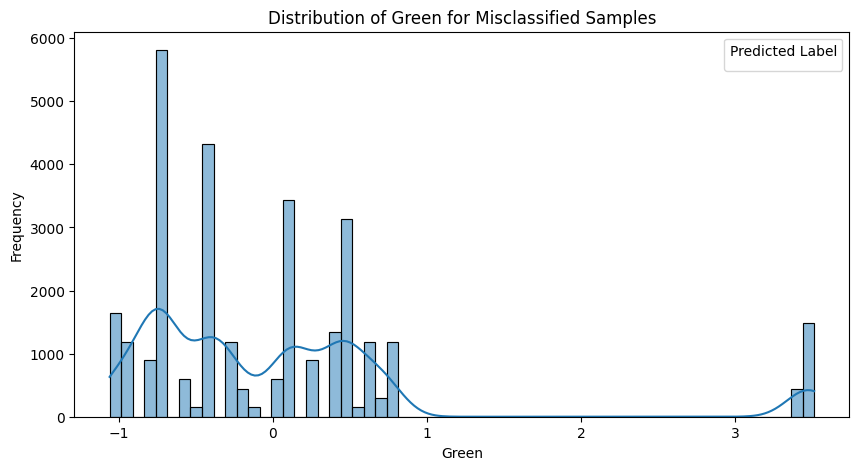

In [ ]:
# STEP 13 VISUALIZE MISCLASSIFICATIONS
# Example: Visualize one feature for misclassified instances
import seaborn as sns
feature_to_visualize = 'Green' # Replace with your feature name
plt.figure(figsize=(10, 5))
sns.histplot(data=misclassified_df, x=feature_to_visualize, hue='Predicted Label', kde=True)
plt.title(f'Distribution of {feature_to_visualize} for Misclassified Samples')
plt.xlabel(feature_to_visualize)
plt.ylabel('Frequency')
plt.legend(title='Predicted Label')
plt.show()


In [ ]:
!pip install flask joblib tensorflow


In [ ]:
import joblib
# Save Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')
# Save Deep Learning model
dl_model.save('deep_learning_model.h5')
